In [15]:
# general packages
import random 
import numpy as np
from collections import Counter
from datetime import date
import os

# packages for 3d visualization
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]
from PIL import Image
from PIL.ImageOps import invert

# core packages
from skimage.draw import random_shapes


In [21]:
# core function to generate a random nuclei instance mask 

def generate_mask(size: tuple, numb_inst: tuple, size_inst: tuple, shape: str, out: str, counter: int, overlap: bool):
    # parameters: size of mask (in px), min and max number of instances, random seed, shape of instances (circle or ellipse), output folder path

    seed = random.choice(range(0,1000))
    images, labels = random_shapes(size, min_shapes = numb_inst[0], max_shapes = numb_inst[1],\
        shape = shape, random_seed = seed, min_size = size_inst[0], max_size = size_inst[1], allow_overlap = overlap)
    bw = np.asarray(images).copy()
    bw[bw < 255] = 0
    bw[bw < 255] = 0
    mask = Image.fromarray(bw)
    mask = invert(mask) # sets background as black and instances as white
    mask.save(f'{out}\img_{counter}.png')


    instance_number = (Counter(elem[0] for elem in labels))[shape]
    log = (f'Type: {shape}; Counter: {counter}; Density: {instance_number}; Mask successfully exported!')
    print(log)

    # TODO
    # allow a maximum overlap 
    # add noise at the borders, make the shapes less perfect 
    # do the same as a second channel for cell instances
    
    return mask, log, instance_number

In [37]:
# generate an user-specified number of nuclei mask images 

##################################################################################################################################

# number of masks randomly generated 
images = 10000

# mask size: tuple(x, y)
size = (1000, 1000)

# number of instances on mask: tuple(min, max)
numb_inst = (20, 120)

# shape: 'circle', 'ellipse', 'triangle'
shape = 'ellipse'

# size of the instances on mask: tuple(min, max)
size_inst = (30, 50)

# overlap of instances: boolean
overlap = True

# output folder
out = "//research.files.med.harvard.edu/sysbio/MEGASON LAB/People/AntoineRuzette/Data"
folder_name = 'NeuralTube_2D_mask_distr'
folder_path = f'{out}/{folder_name}_{str(date.today())}'
log_path = f'{folder_path}/log.txt'
###################################################################################################################################    


if ~os.path.isdir(folder_path):
    os.mkdir(folder_path)

inst_numb_list = np.zeros(images)
for idx in range(images):
    slice_z, log, instance_number = generate_mask(size, numb_inst, size_inst, shape, folder_path, idx, overlap)
    inst_numb_list[idx] = int(instance_number)

    # write in log file
    with open(log_path, 'a') as log_file:
        log_file.write(log + '\n')

Type: ellipse; Counter: 0; Density: 46; Mask successfully exported!
Type: ellipse; Counter: 1; Density: 26; Mask successfully exported!
Type: ellipse; Counter: 2; Density: 69; Mask successfully exported!
Type: ellipse; Counter: 3; Density: 88; Mask successfully exported!
Type: ellipse; Counter: 4; Density: 80; Mask successfully exported!
Type: ellipse; Counter: 5; Density: 110; Mask successfully exported!
Type: ellipse; Counter: 6; Density: 94; Mask successfully exported!
Type: ellipse; Counter: 7; Density: 76; Mask successfully exported!
Type: ellipse; Counter: 8; Density: 30; Mask successfully exported!
Type: ellipse; Counter: 9; Density: 69; Mask successfully exported!
Type: ellipse; Counter: 10; Density: 32; Mask successfully exported!
Type: ellipse; Counter: 11; Density: 82; Mask successfully exported!
Type: ellipse; Counter: 12; Density: 86; Mask successfully exported!
Type: ellipse; Counter: 13; Density: 73; Mask successfully exported!
Type: ellipse; Counter: 14; Density: 41; Ma

In [1]:
# plot instances density distribution 

print(np.mean(inst_numb_list))

plt.hist(inst_numb_list, bins = 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Number of instances')
plt.ylabel('Density')
plt.title('Distribution of the number of nuclei instances in mask, N = 10.000, bins = 50')
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

Image shape: (1000, 1000, 3)
Labels: [('circle', ((315, 376), (250, 311))), ('circle', ((258, 313), (814, 869))), ('circle', ((659, 712), (509, 562))), ('circle', ((314, 367), (375, 428))), ('circle', ((220, 277), (630, 687))), ('circle', ((147, 204), (568, 625))), ('circle', ((771, 824), (846, 899))), ('circle', ((198, 249), (878, 929))), ('circle', ((766, 817), (715, 766))), ('circle', ((677, 738), (903, 964))), ('circle', ((40, 99), (621, 680))), ('circle', ((394, 449), (638, 693))), ('circle', ((37, 98), (18, 79))), ('circle', ((776, 827), (300, 351))), ('circle', ((74, 133), (480, 539))), ('circle', ((398, 451), (842, 895))), ('circle', ((510, 567), (486, 543))), ('circle', ((842, 891), (453, 502))), ('circle', ((454, 513), (32, 91))), ('circle', ((639, 690), (660, 711))), ('circle', ((138, 191), (265, 318))), ('circle', ((393, 444), (167, 218))), ('circle', ((109, 166), (733, 790))), ('circle', ((913, 974), (754, 815))), ('circle', ((11, 66), (732, 787))), ('circle', ((922, 973),

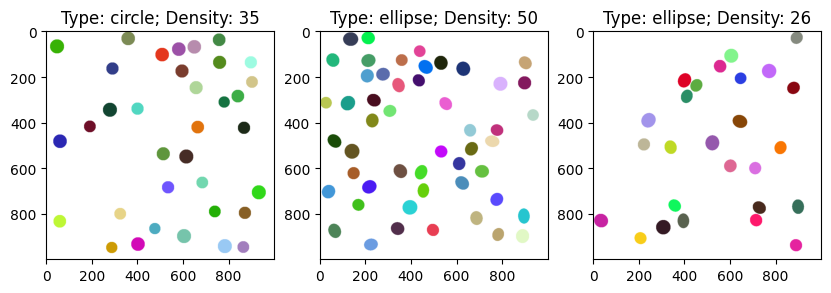

In [105]:
# initiate random choice

img_number = 10
img_shape = (1000, 1000)

fig, axes = plt.subplots(nrows=1, ncols=img_number)
ax = axes.ravel()

for i in range(0, img_number):
    min_shapes = random.choice(range(15, 30))
    max_shapes = random.choice(range(30, 120))
    seed = random.choice(range(0,1000))
    shapes = random.choice(['circle', 'ellipse'])

    images, labels = random_shapes(img_shape, min_shapes = min_shapes, max_shapes=max_shapes,\
        shape=shapes, random_seed=seed, min_size=50, max_size=65, allow_overlap=False)
    images = np.array(images)
    #mask = polygon2mask(img_shape, images)
    print(f'Image shape: {images.shape}\nLabels: {labels}')

    ax[i].imshow(images, cmap='Greens')
    ax[i].set_title(f'Type: {shapes}; Density: {(Counter(elem[0] for elem in labels))[shapes]}')
